# A. Descriptive Statistics

Before modeling, we need to understand what the data is actually doing. Descriptive statistics are the first pass: simple numbers that summarize large, messy reality.  

This section explores what these statistics mean, when they mislead, and how the break in the presence of outliers.

## A.1 What descriptive statistics are (and are not)

Summaries compress information, and compression always loses detail.  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>What they do well</th>
            <th>What they hide</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Give fast orientation</td>
            <td>Multimodality and skew</td>
        </tr>
        <tr>
            <td>Enable comparisons</td>
            <td>Outliers adn tail risk</td>
        </tr>
        <tr>
            <td>Support sanity checks</td>
            <td>Group-level structure</td>
        </tr>
    </tbody>
</table>

**EDA RULE #1**
Never trust a single number without seeing the distribution it came from

### Microlab: One "average", two totally different realities  

Two datasets can share the same mean and still behave very differently. 

A mean: 10.0 A median: 10.0
B mean: 10.0 B median: 0.0


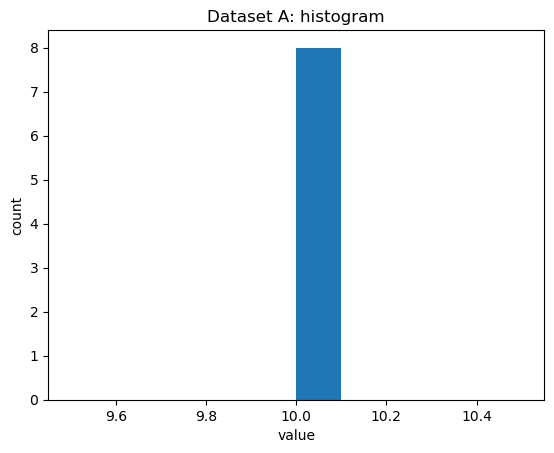

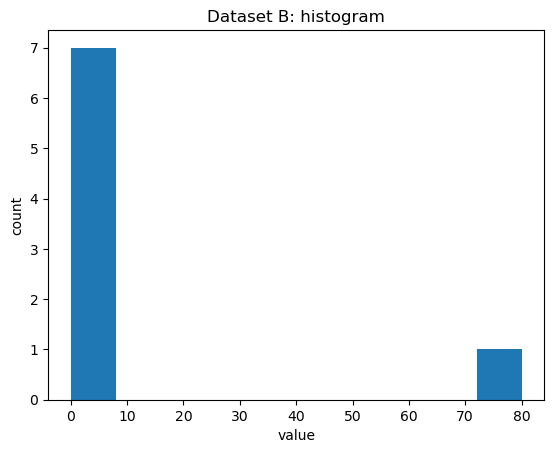

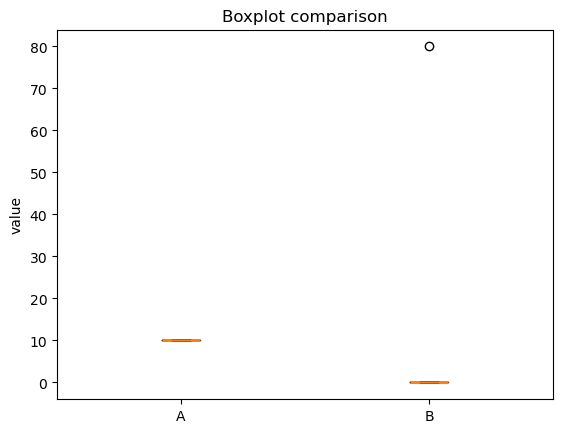


Key ideas:
1) The same mean can come from totally different distributions.
2) Descriptive stats compress information — the shape still matters.
3) Plots are not decoration; they're a sanity check on your summaries.

Try:
- Create dataset C with TWO modes (e.g., many 0s and many 20s). Same mean, new story.
- Add 2–3 moderate outliers instead of one extreme outlier — how do the plots change?
- Swap the histogram bins (10 vs 50). What stays the same? What changes?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

# Two datasets with the same mean (~10), very different shapes
a = pd.Series([10,10,10,10,10,10,10,10])
b = pd.Series([0,0,0,0,0,0,0,80])

print("A mean:", float(a.mean()), "A median:", float(a.median()))
print("B mean:", float(b.mean()), "B median:", float(b.median()))

plt.figure()
plt.hist(a, bins=10)
plt.title("Dataset A: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(b, bins=10)
plt.title("Dataset B: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.boxplot([a, b], tick_labels=["A", "B"])
plt.title("Boxplot comparison")
plt.ylabel("value")
plt.show()

print("\nKey ideas:")
print("1) The same mean can come from totally different distributions.")
print("2) Descriptive stats compress information — the shape still matters.")
print("3) Plots are not decoration; they're a sanity check on your summaries.")

print("\nTry:")
print("- Create dataset C with TWO modes (e.g., many 0s and many 20s). Same mean, new story.")
print("- Add 2–3 moderate outliers instead of one extreme outlier — how do the plots change?")
print("- Swap the histogram bins (10 vs 50). What stays the same? What changes?")

# A.2 Central Tendency

"Typical" depends on how your data misbehaves  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Statistic</th>
            <th>What it answers</th>
            <th>Failure mode</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Mean</td>
            <td>Average value</td>
            <td>Dragged by outliers</td>
        </tr>
        <tr>
            <td>Median</td>
            <td>Middle observation</td>
            <td>Ignores tail magnitude</td>
        </tr>
        <tr>
            <td>Mode</td>
            <td>Most common value</td>
            <td>Unstable / non-unique</td>
        </tr>
    </tbody>
</table>

### Microlab: Mean vs Median under skew (with plot)  

Add one extreme value, watch the mean move while the median stays put


Original:
 n: 7
 mean: 12.142857142857142
 median 12.0

With outlier:
 n: 8
 mean: 73.125
 median 12.5


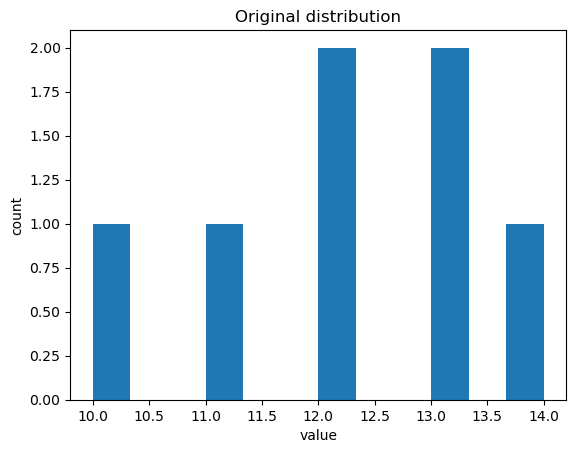

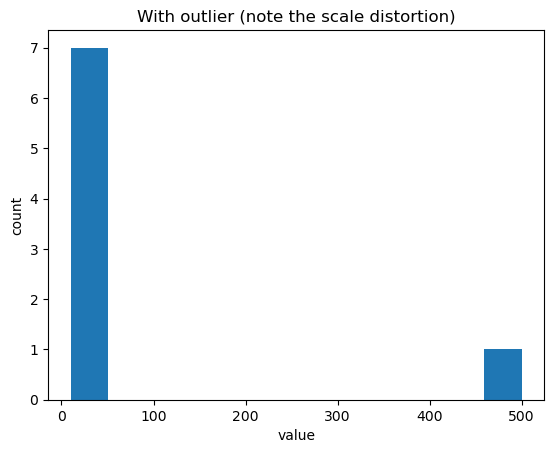

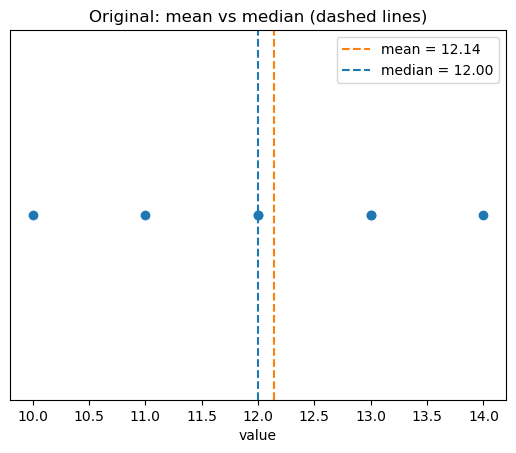

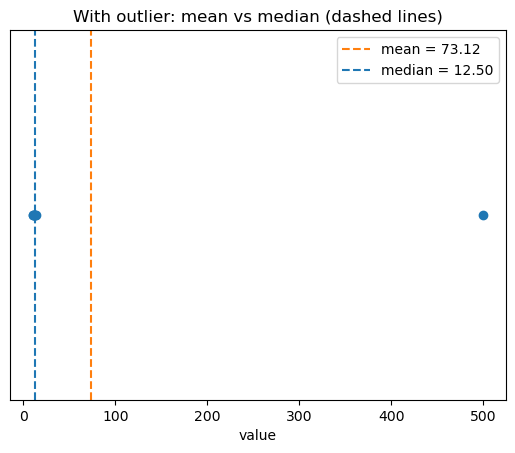


Key ideas:
1) Mean is sensitive to extreme values; median is robust.
2) 'Typical' depends on your decision context (risk vs average).
3) Always pair a center statistic with a plot of the distribution.

Try:
- Replace 500 with 40. Does the mean still feel misleading?
- Add TWO outliers (e.g., 200 and 500). What happens to mean vs median?
- Create a right-skewed dataset (e.g., exponential) and compare mean/median.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

data = pd.Series([10, 11, 12, 12, 13, 13, 14])
data_outlier = pd.concat([data, pd.Series([500])], ignore_index=True)

def summarize(x, name):
    print(f"\n{name}:")
    print(" n:", len(x))
    print(" mean:", float(x.mean()))
    print(" median", float(x.median()))

summarize(data, "Original")
summarize(data_outlier, "With outlier")

plt.figure()
plt.hist(data, bins=12)
plt.title("Original distribution")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(data_outlier, bins=12)
plt.title("With outlier (note the scale distortion)")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.plot(np.sort(data.values), np.zeros(len(data)), "o")
plt.axvline(
    data.mean(),
    linestyle="--",
    color="tab:orange",
    label=f"mean = {data.mean():.2f}"
)
plt.axvline(
    data.median(),
    linestyle="--",
    color="tab:blue",
    label=f"median = {data.median():.2f}"
)
plt.legend()
plt.title("Original: mean vs median (dashed lines)")
plt.yticks([])
plt.xlabel("value")
plt.show()

plt.figure()
plt.plot(np.sort(data_outlier.values),np.zeros(len(data_outlier)), "o")
plt.axvline(
    data_outlier.mean(),
    linestyle="--",
    color="tab:orange",
    label=f"mean = {data_outlier.mean():.2f}"
)
plt.axvline(
    data_outlier.median(),
    linestyle="--",
    color="tab:blue",
    label=f"median = {data_outlier.median():.2f}"
)
plt.legend()
plt.title("With outlier: mean vs median (dashed lines)")
plt.yticks([])
plt.xlabel("value")
plt.show()

print("\nKey ideas:")
print("1) Mean is sensitive to extreme values; median is robust.")
print("2) 'Typical' depends on your decision context (risk vs average).")
print("3) Always pair a center statistic with a plot of the distribution.")

print("\nTry:")
print("- Replace 500 with 40. Does the mean still feel misleading?")
print("- Add TWO outliers (e.g., 200 and 500). What happens to mean vs median?")
print("- Create a right-skewed dataset (e.g., exponential) and compare mean/median.")



## A.3 Spread and Variablity

Two datasets can share a mean and behave differently.  

<table style="text-align:left;">
    <caption style="font-weight: bold;">Common Measures of Spread</caption>
    <thead>
        <tr>
            <th>Statistic</th>
            <th>What it measures</th>
            <th>Sensitivity</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Range</td>
            <td>min &rarr; max</td>
            <td>Extremely sensitive</td>
        </tr>
        <tr>
            <td>Variance</td>
            <td>Average squared deviation</td>
            <td>Outliers dominate</td>
        </tr>
        <tr>
            <td>Standard Deviation</td>
            <td>Typical  deviation (&radic; variance)</td>
            <td>Outliers dominate</td>
        </tr>
        <tr>
            <td>IQR</td>
            <td>Spread of the middle 50%</td>
            <td>Robust to tails</td>
        </tr>
        <tr>
            <td>MAD</td>
            <td>Median absolute deviation from the median</td>
            <td>Highly robust</td>
        </tr>
    </tbody>
</table>

### Microlab: Spread changes everything  

Two datasets with the same mean: compare std dev vs IQR and visualize

A: mean 10.0 std 0.0 iqr 0.0 range 0.0
B: mean 10.0 std 6.670832032063167 iqr 10.0 range 16.0

Key ideas:
1) Mean does not tell you about risk; spread does.
2) Std dev is tail-sensitive; IQR summarizes the middle (robust).
3) Quantiles (p90/p95) often matter more than averages in real systems.

Try:
- Add a single extreme outlier to dataset B. Which spread metric changes most?
- Make dataset A slightly noisy (e.g., [9,10,10,10,11]). How do std and IQR react?
- Compare p90 and p95 for B — what do they say about tail risk?


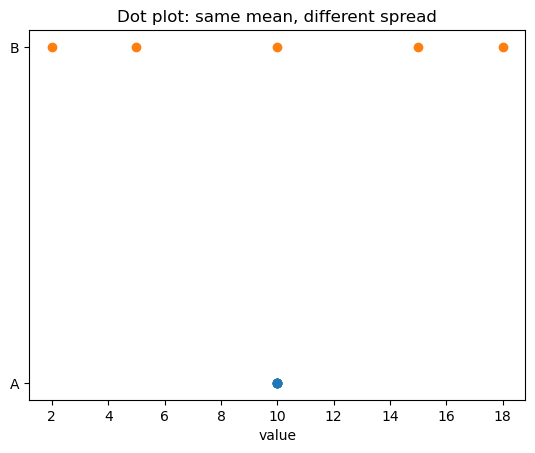

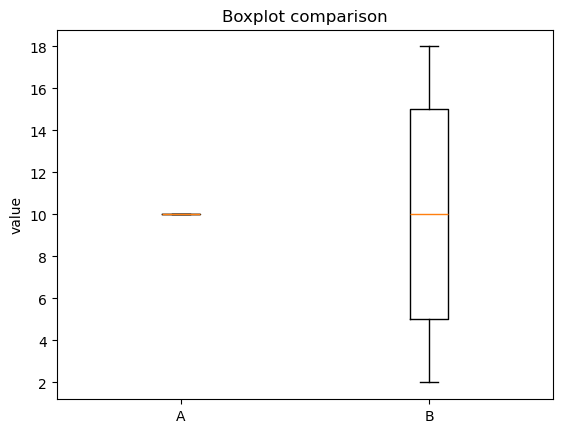

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

a = pd.Series([10, 10, 10, 10, 10])
b = pd.Series([2, 5, 10, 15, 18])

def iqr(x):
    return float(x.quantile(0.75) - x.quantile(0.25))

print("A: mean", float(a.mean()), "std", float(a.std(ddof=1)), "iqr", iqr(a), "range", float(a.max()-a.min()))
print("B: mean", float(b.mean()), "std", float(b.std(ddof=1)), "iqr", iqr(b), "range", float(b.max()-b.min()))

# Dot Plot
plt.figure()
plt.plot(np.sort(a.values), np.zeros(len(a)), "o", label="A")
plt.plot(np.sort(b.values), np.ones(len(b)), "o", label="B")
plt.yticks([0,1], ["A","B"])
plt.title("Dot plot: same mean, different spread")
plt.xlabel("value")
plt.show

# Box Plot
plt.figure()
plt.boxplot([a, b], tick_labels=["A", "B"])
plt.title("Boxplot comparison")
plt.ylabel("value")
plt.show

print("\nKey ideas:")
print("1) Mean does not tell you about risk; spread does.")
print("2) Std dev is tail-sensitive; IQR summarizes the middle (robust).")
print("3) Quantiles (p90/p95) often matter more than averages in real systems.")

print("\nTry:")
print("- Add a single extreme outlier to dataset B. Which spread metric changes most?")
print("- Make dataset A slightly noisy (e.g., [9,10,10,10,11]). How do std and IQR react?")
print("- Compare p90 and p95 for B — what do they say about tail risk?")

## Robust Statistics

Robust methods are designed to fail gracefully.

Real datasets contain errors, rare events, and heavy tails. Robust statistics reduce the influence of extreme values without pretending they do not exist.  

<table style="text-align:left;">
    <caption style="font-weight: bold;">Common Robust Alternatives</caption>
    <thead>
        <tr>
            <td>Instead of</td>
            <td>Use</td>
            <td>Why</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Mean</td>
            <td>Median</td>
            <td>Insensitive to extremes</td>
        </tr>
        <tr>
            <td>Std dev</td>
            <td>IQR / MAD</td>
            <td>Stable under contamination</td>
        </tr>
        <tr>
            <td>Raw values</td>
            <td>Winsorized values</td>
            <td>Limits tail influence</td>
        </tr>
    </tbody>
</table>

### Microlab: MAD vs Standard Deviation (with plot)  

Compare how two spread measures behave when your data has "contamination" (a rare extreme value). Standard deviation will blow up while MAD stays stable.  

One clean data vs contaminated data


Clean:
 mean: 12.875
 median: 12.5
 std: 2.03100960115899
 IQR: 2.5
 MAD: 1.5

Contaminated:
 mean: 33.666666666666664
 median: 13.0
 std: 62.403926158535896
 IQR: 3.0
 MAD: 2.0


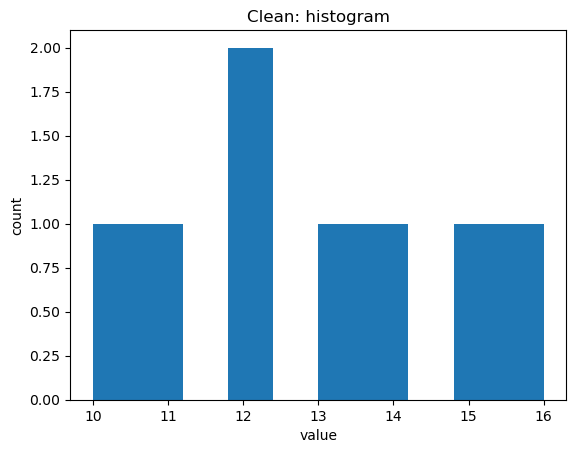

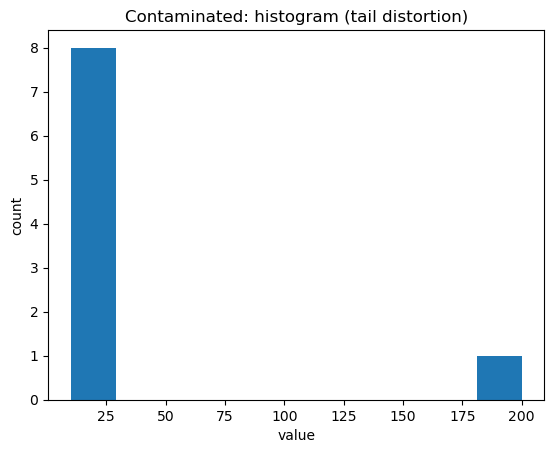

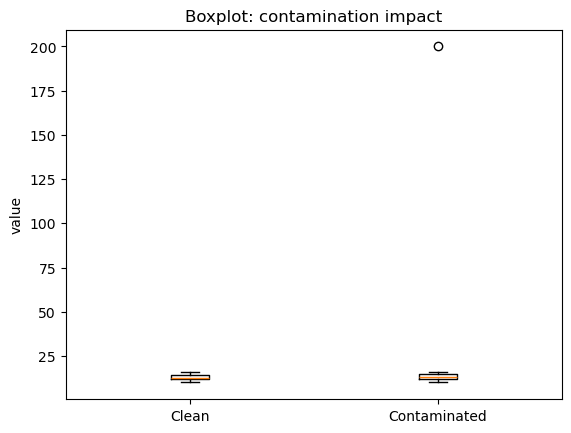


Key ideas:
1) Std dev is dominated by extremes; MAD is anchored to the median.
2) Robust stats don’t remove outliers — they reduce their influence on summaries.
3) In production data, robustness is often a necessity, not a preference.

Try:
- Replace 200 with 60. When does std dev start to diverge from MAD?
- Add multiple moderate outliers (e.g., 40, 60, 80) and compare again.
- Winsorize the contaminated data (clip to 1%–99%) and recompute std/MAD.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

clean = pd.Series([10, 11, 12, 12, 13, 14, 15, 16])
contaminated = pd.concat([clean, pd.Series([200])], ignore_index=True)

def mad(x):
    return float((x - x.median()).abs().median())

def iqr(x):
    return float(x.quantile(0.75) - x.quantile(0.25))

def summarize(x, name):
    print(f"\n{name}:")
    print(" mean:", float(x.mean()))
    print(" median:", float(x.median()))
    print(" std:", float(x.std(ddof=1)))
    print(" IQR:", iqr(x))
    print(" MAD:", mad(x))

summarize(clean, "Clean")
summarize(contaminated, "Contaminated")

# Histogram - clean data
plt.figure()
plt.hist(clean, bins=10)
plt.title("Clean: histogram")
plt.xlabel("value")
plt.ylabel("count")
plt.show

# Histogram - contaminated data
plt.figure()
plt.hist(contaminated, bins=10)
plt.title("Contaminated: histogram (tail distortion)")
plt.xlabel("value")
plt.ylabel("count")
plt.show

# Boxplot - compare
plt.figure()
plt.boxplot([clean, contaminated], tick_labels=["Clean", "Contaminated"])
plt.title("Boxplot: contamination impact")
plt.ylabel("value")
plt.show()

print("\nKey ideas:")
print("1) Std dev is dominated by extremes; MAD is anchored to the median.")
print("2) Robust stats don’t remove outliers — they reduce their influence on summaries.")
print("3) In production data, robustness is often a necessity, not a preference.")

print("\nTry:")
print("- Replace 200 with 60. When does std dev start to diverge from MAD?")
print("- Add multiple moderate outliers (e.g., 40, 60, 80) and compare again.")
print("- Winsorize the contaminated data (clip to 1%–99%) and recompute std/MAD.")

## A.5 Lab Excercise

In Lab Notebook

# B. Visualization as Thinking

Plots are not presentations. They are thinking tools. In EDA, the job is to build an accurate mental model of the data: what's common, what's rare, what varies by group, and which patterns are real versus accidental.  

This section teaches a small set of plots you can rely on. The goal is to ask better questions and catch wrong assumptions early.

## B.1 Visualization is a Reasoning Tool

A plot is a hypothesis about what matters, and a stress test of summaries.  

<table style="text-align:left;">
    <caption style="font-weight: bold;">What plots are four</caption>
    <thead>
        <tr>
            <th>Task</th>
            <th>Best first plot</th>
            <th>What you are trying to learn</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Understand a single variable</td>
            <td>Histogram + boxplot</td>
            <td>Skew, tails, multimodality, outliers</td>
        </tr>
        <tr>
            <td>Understand two variables</td>
            <td>Scatter (or hexbin)</td>
            <td>Trend, noise, nonlinearity, clusters</td>
        </tr>
        <tr>
            <td>Compare groups</td>
            <td>Small multiples, boxplot by group</td>
            <Td>Shifts in center and tail risk</Td>
        </tr>
        <tr>
            <td>Watch a metric over time</td>
            <td>Line plot of aggregates</td>
            <td>Seasonality, drift, logging changes</td>
        </tr>
    </tbody>
</table>

**EDA Rule**  
If a plot is surprising, assume the assumption is wrong before assuming the data is wrong.

## B.2 Distributions: Shape, Skew, Tails

Most real-world variables are not bell curves. The plots should reveal that quickly.  

**Three failure modes the first histogram should catch**  
* **Skew + tail risk:** median is stable, mean gets pulled
* **Multimodality:** one average hides two populations
* **Hidden zeros/missing codes:** spikes at 0, -1, 9999, or empty strings

### Microlab: Linear vs Log View (tail visibility)  

A linear histogram can hide structure when a distribution has a heavy tail. A log transform (or log-like view) is often the difference between "looks fine" and "aha!"

Summary:
count    1000.000000
mean        5.680459
std        16.049752
min         0.000975
50%         1.710309
90%         7.755539
95%        26.500767
99%        78.991305
max       218.006320
dtype: float64


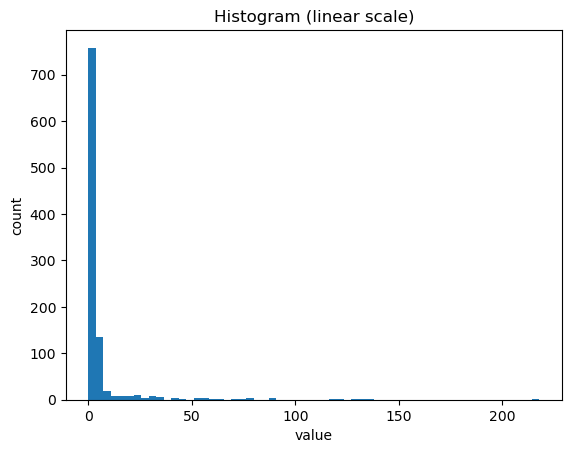

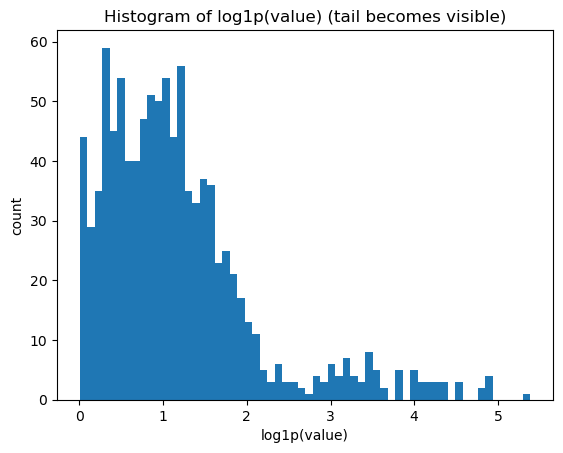

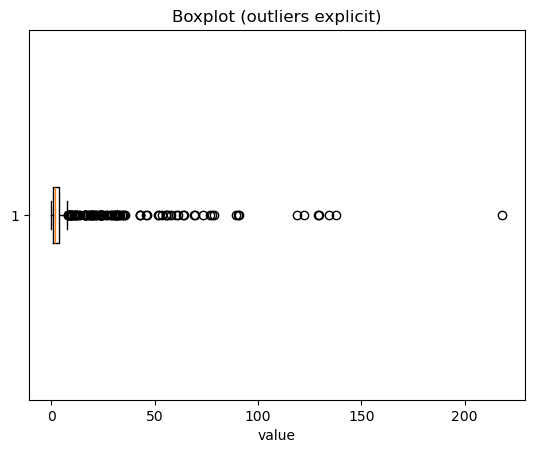


Key ideas:
1) A linear histogram can hide long tails.
2) log1p is a viewing tool; it changes the visual story.
3) Always quantify tails with p90/p95/p99, not just the mean.

Try:
- Change tail size from 100 to 20. How does the story change?
- Replace exponential with normal. What plots become 'boring'? Why is that rare in practice?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(0)

# A heavy-tailed synthetic variable (think: response times)
core = rng.exponential(scale=2.0, size=900)  # lots of small values
tail = rng.exponential(scale=40.0, size=100) # rare, very large values
x = pd.Series(np.concatenate([core, tail]))

print("Summary:")
print(x.describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

plt.figure()
plt.hist(x, bins=60)
plt.title("Histogram (linear scale)")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(np.log1p(x), bins=60)
plt.title("Histogram of log1p(value) (tail becomes visible)")
plt.xlabel("log1p(value)")
plt.ylabel("count")
plt.show()

plt.figure()
plt.boxplot(x, vert=False, showfliers=True)
plt.title("Boxplot (outliers explicit)")
plt.xlabel("value")
plt.show()

print("\nKey ideas:")
print("1) A linear histogram can hide long tails.")
print("2) log1p is a viewing tool; it changes the visual story.")
print("3) Always quantify tails with p90/p95/p99, not just the mean.")

print("\nTry:")
print("- Change tail size from 100 to 20. How does the story change?")
print("- Replace exponential with normal. What plots become 'boring'? Why is that rare in practice?")

## B.3 Relationships: Correlation is Not a Plot

A single correlation number can hide nonlinearity, clusters, and confounding  

**What a relationship plot can reveal**  
* **Nonlinearity:** a curve can have low correlation but strong structure
* **Clusters:** two groups can create misleading overall trends
* **Heteroskedasticity:** variance changes with x (fan shapes)

## Microlab: Same correlation, different story  

Create datasets that have similar correlations but very different relationships. The point: correlation is a summary, not an explanation

Correlation (linear-ish): 0.9106596406987684
Correlation (nonlinear): 0.049346770803480475


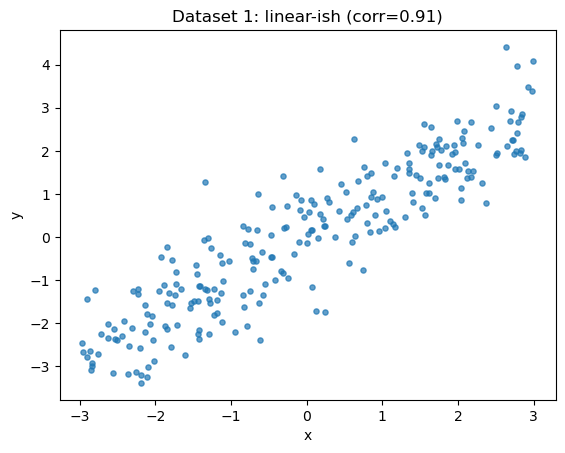

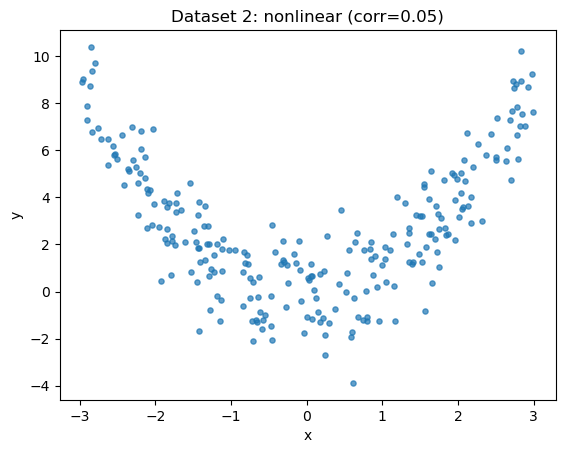


Key ideas:
1) Correlation does not detect nonlinear relationships.
2) Always look at a scatter plot (or hexbin) before trusting a correlation.
3) If you see clusters, you probably need group comparisons (next section).

Try:
- Reduce noise in y2. Does correlation change? Does the plot change more?
- Create two clusters with different means. What happens to correlation?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(1)

n = 250
x = rng.uniform(-3, 3, size=n)

# Dataset 1: roughly linear
y1 = 0.9 * x + rng.normal(0, 0.8, size=n)

# Dataset 2: nonlinear (U-shape), can have low-ish correlation depending on noise
y2 = (x**2) + rng.normal(0, 1.2, size=n)

corr1 = np.corrcoef(x, y1)[0,1]
corr2 = np.corrcoef(x, y2)[0,1]

print("Correlation (linear-ish):", float(corr1))
print("Correlation (nonlinear):", float(corr2))

plt.figure()
plt.scatter(x, y1, s=14, alpha=0.7)
plt.title(f"Dataset 1: linear-ish (corr={corr1:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.scatter(x, y2, s=14, alpha=0.7)
plt.title(f"Dataset 2: nonlinear (corr={corr2:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print("\nKey ideas:")
print("1) Correlation does not detect nonlinear relationships.")
print("2) Always look at a scatter plot (or hexbin) before trusting a correlation.")
print("3) If you see clusters, you probably need group comparisons (next section).")

print("\nTry:")
print("- Reduce noise in y2. Does correlation change? Does the plot change more?")
print("- Create two clusters with different means. What happens to correlation?")

## B.4 Group Comparisons: Shifts and Differences

Many "patterns" are really group differences. Your plots should separate them.  

<table style="text-align:left;">
    <caption style="font-weight: bold;">What to Compare Across Groups</caption>
    <thead>
        <tr>
            <th>Compare</th>
            <th>Plot</th>
            <th>Question it Answers</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Center (typical)</td>
            <td>Boxplot by group</td>
            <td>Who is "typically" higher/lower?</td>
        </tr>
        <tr>
            <td>Tail risk</td>
            <td>Quantile table/violin/boxplot</td>
            <td>Whose worst-case is much worse?</td>
        </tr>
        <tr>
            <td>Rates</td>
            <td>Bar chart of proportions</td>
            <td>Which group behaves differently?</td>
        </tr>
        <tr>
            <td>Time drift</td>
            <td>Line plot over time by group</td>
            <td>Did something change?</td>
        </tr>
    </tbody>
</table>

### Microlab: Misleading "overall" vs honest group view  

This lab creates two groups with different relationships. If you plot everything together, you get a misleading story. If you plot by group, the truth becomes obvious.

Overall correlation: 0.16875769666241924
Group A correlation: 0.9470341258996134
Group B correlation: -0.9161799534723615


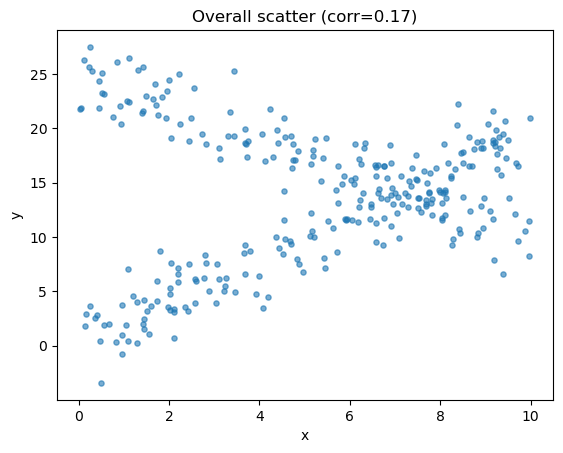

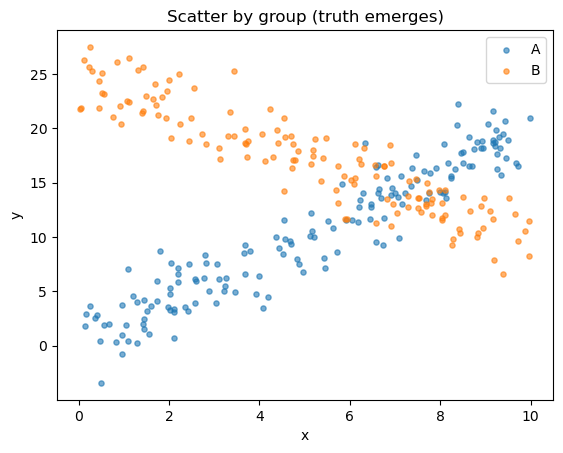


Key ideas:
1) 'Overall' can hide opposite subgroup relationships.
2) Always check if group structure exists (agency, category, region, time).
3) If subgroup trends differ, modeling must respect that (interactions or separate models).

Try:
- Change the intercept for group B. Can you make overall correlation near 0 while subgroups are strong?
- Add a third group C. Does the 'overall' plot become impossible to interpret?


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(2)

n = 300
group = np.where(rng.random(n) < 0.5, "A", "B")

x = rng.uniform(0, 10, size=n)

# Different relationships by group
y = np.where(
    group == "A",
    2.0 * x + rng.normal(0, 2.0, size=n),       # strong positive slope
    -1.5 * x + 25 + rng.normal(0, 2.0, size=n)  # strong negative slope
)

df = pd.DataFrame({"group": group, "x": x, "y": y})

overall_corr = df[["x","y"]].corr().iloc[0,1]
corr_A = df.loc[df["group"]=="A", ["x","y"]].corr().iloc[0,1]
corr_B = df.loc[df["group"]=="B", ["x","y"]].corr().iloc[0,1]

print("Overall correlation:", float(overall_corr))
print("Group A correlation:", float(corr_A))
print("Group B correlation:", float(corr_B))

plt.figure()
plt.scatter(df["x"], df["y"], s=14, alpha=0.6)
plt.title(f"Overall scatter (corr={overall_corr:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
for g in ["A", "B"]:
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], s=14, alpha=0.6, label=g)
plt.title("Scatter by group (truth emerges)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("\nKey ideas:")
print("1) 'Overall' can hide opposite subgroup relationships.")
print("2) Always check if group structure exists (agency, category, region, time).")
print("3) If subgroup trends differ, modeling must respect that (interactions or separate models).")

print("\nTry:")
print("- Change the intercept for group B. Can you make overall correlation near 0 while subgroups are strong?")
print("- Add a third group C. Does the 'overall' plot become impossible to interpret?")

## B.5 Lab Exercise

# C. Correlation vs Causation

EDA is where you find patterns. It is also where you accidentally hallucinate patterns into existence. Correlation is a powerful summary of association, but it does not tell you why something happened.  

This section teaches a simple habit: when you see a relationship, immediately ask, "What else could produce the same pattern?" Then run a few fast checks that reduce self-deception.

## C.1 What Correlation Can (and Cannot) Tell You

**What correlation can (and cannot) tell you**  

Correlation measures association - not mechanism

Correlation answers one question: Do these two variables move together?

<table style="text-align=left;">
    <thead>
        <tr>
            <th>Question</th>
            <th>Correlation helps?</th>
            <th>What you need instead</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Do X and Y co-vary?</td>
            <td>YES</td>
            <td>Plots + summary stats + subgroup checks</td>
        </tr>
        <tr>
            <td>Does changing X change Y?</td>
            <td>NO</td>
            <td>Experiment or careful causal identification</td>
        </tr>
        <tr>
            <td>Is X a useful predictor of Y?</td>
            <td>Sometimes</td>
            <td>Evaluation on held-out data (later modules)</td>
        </tr>
        <tr>
            <td>Is X a root cause of Y?</td>
            <td>NO</td>
            <td>Causal model + assumptions + domain knowledge</td>
        </tr>
    </tbody>
</table>

**The operational definition**  
**Causations** is about interventions: if you could set X to a different value, would Y change as a result

### Microlab: Correlation can be zero while a relationship is strong  



corr(x, y) = 0.03240299559659885


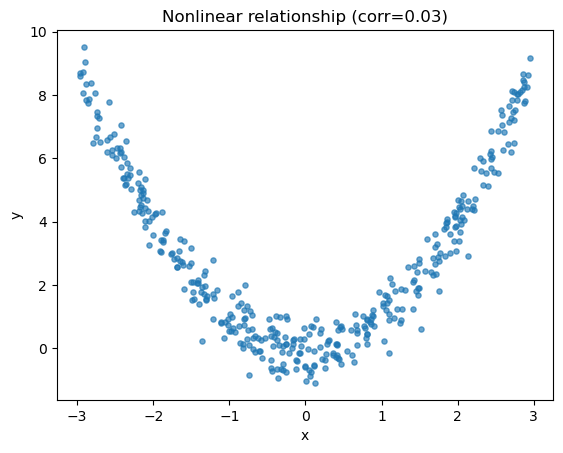

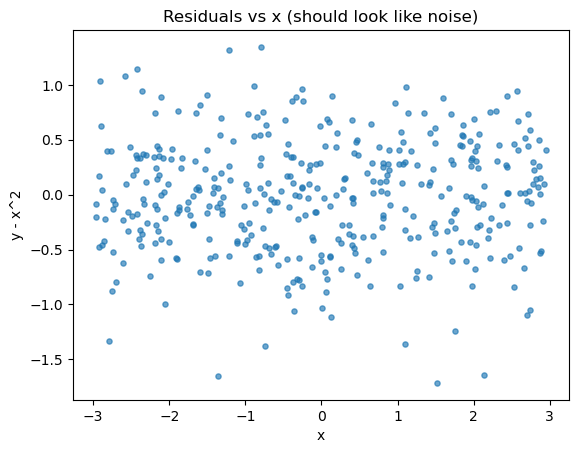


Key ideas:
1) Correlation only captures linear co-movement.
2) A low correlation does NOT mean 'no relationship'.

Try:
- Increase the noise (0.5 → 2.0). How does the scatter change vs correlation?
- Replace x**2 with np.sin(x*2). Can you get correlation near 0 with obvious structure?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(10)
n = 400

x = rng.uniform(-3, 3, size=n)

# Strong nonlinear relationship: y depends on x^2
y = (x**2) + rng.normal(0, 0.5, size=n)

corr = float(np.corrcoef(x, y)[0, 1])
print("corr(x, y) =", corr)

plt.figure()
plt.scatter(x, y, s=14, alpha=0.65)
plt.title(f"Nonlinear relationship (corr={corr:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
plt.scatter(x, y - (x**2), s=14, alpha=0.65)
plt.title("Residuals vs x (should look like noise)")
plt.xlabel("x")
plt.ylabel("y - x^2")
plt.show()

print("\nKey ideas:")
print("1) Correlation only captures linear co-movement.")
print("2) A low correlation does NOT mean 'no relationship'.")

print("\nTry:")
print("- Increase the noise (0.5 → 2.0). How does the scatter change vs correlation?")
print("- Replace x**2 with np.sin(x*2). Can you get correlation near 0 with obvious structure?")

## C.2 Spurious Correlations and Multiple Comparisons

If you search enough, you will discover something that is not real.  

**Why spurious correlations are guaranteed**  

In real EDA, you might compute correlations between a target and dozens of features. Even if the world has no real relationships, random noise will produce apparently strong correlations.  

**Multiple comparisons problem:**
Top correlation is not the same as real signal. The more things you test, the more false positives you get.

### Microlab: P-hacking with correlations  

Genarate a dataset where the target is pure noise, then compute correlations against many random features. 

Target is pure noise.
Number of features tried: 200
Best (by absolute value) correlation found: -0.17755266198915884


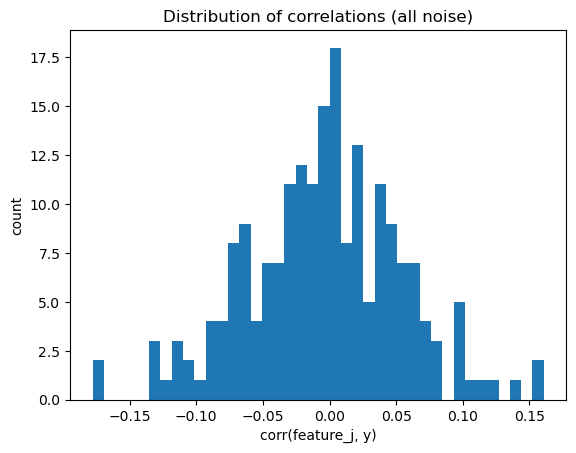

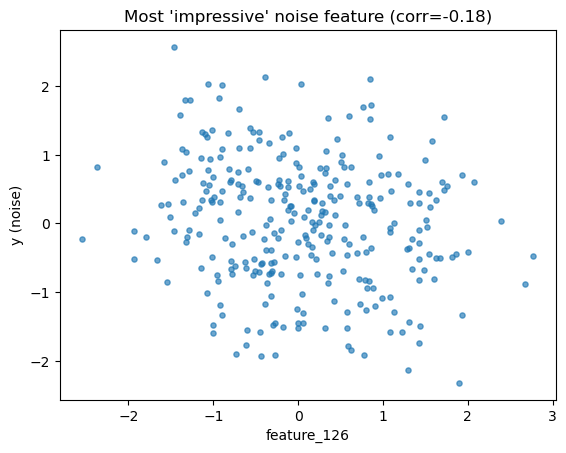


Key ideas:
1) Searching many correlations guarantees false positives.
2) The 'best' correlation is biased upward because you selected it.
3) Signal requires confirmation: new data, stronger design, or prior justification.

Try:
- Increase p to 1000. What happens to the best correlation?
- Increase n to 5000. Does the best correlation shrink?
- Repeat with a fixed seed change. Is the 'best feature' stable?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(11)

n = 300
p = 200  # number of features you "try"
y = rng.normal(0, 1, size=n)  # pure noise target

X = rng.normal(0, 1, size=(n, p))  # pure noise features

# Compute correlations
corrs = (X - X.mean(axis=0)) / X.std(axis=0)
y_std = (y - y.mean()) / y.std()
corr_vals = (corrs * y_std[:, None]).mean(axis=0)

abs_corr = np.abs(corr_vals)
best_j = int(abs_corr.argmax())
best_corr = float(corr_vals[best_j])

print("Target is pure noise.")
print("Number of features tried:", p)
print("Best (by absolute value) correlation found:", best_corr)

plt.figure()
plt.hist(corr_vals, bins=40)
plt.title("Distribution of correlations (all noise)")
plt.xlabel("corr(feature_j, y)")
plt.ylabel("count")
plt.show()

plt.figure()
plt.scatter(X[:, best_j], y, s=14, alpha=0.65)
plt.title(f"Most 'impressive' noise feature (corr={best_corr:.2f})")
plt.xlabel(f"feature_{best_j}")
plt.ylabel("y (noise)")
plt.show()

print("\nKey ideas:")
print("1) Searching many correlations guarantees false positives.")
print("2) The 'best' correlation is biased upward because you selected it.")
print("3) Signal requires confirmation: new data, stronger design, or prior justification.")

print("\nTry:")
print("- Increase p to 1000. What happens to the best correlation?")
print("- Increase n to 5000. Does the best correlation shrink?")
print("- Repeat with a fixed seed change. Is the 'best feature' stable?")

## C.3 Confounding Variables (and Why Stratifying Works)

A confounder is a hidden driver that creates an association you mistake for a causal link.  

**The classic failure mode**  
Confounding happens when a third variable Z influences both X and Y. Then X and Y appear correlated even if X does not cause Y.  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Pattern</th>
            <th>What you see</th>
            <th>What is actually happening</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Confounding</td>
            <td>X &harr; Y</td>
            <td>Z &rarr; and Z &rarr; Y</td>
        </tr>
        <tr>
            <td>Reverse causality</td>
            <td>X &harr; Y</td>
            <td>Y &rarr; X (wrong direction)</td>
        </tr>
        <tr>
            <td>Selection bias</td>
            <td>X &harr; Y (in your sample)</td>
            <td>Data includes a biased subset of reality</td>
        </tr>
    </tbody>
</table>  

**Fast antitode: Stratify**  
If you suspect a confounder, compare the relationship **whithin strata** intead of only overall.

### Microlab: Simpson's Paradox via a Confounder  

Overall correlation can reverse when you put a condition on a group.  

This microlab constructs a dataset where the overall correlation suggests one story, but within each group the story is the opposite. This exactly why "overall" is dangerous

Overall corr: 0.8596045039509526
Group A corr: -0.8125456905283771
Group B corr: -0.822532500735814


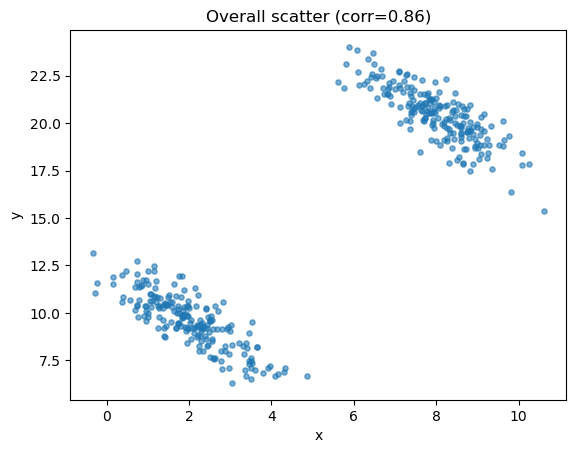

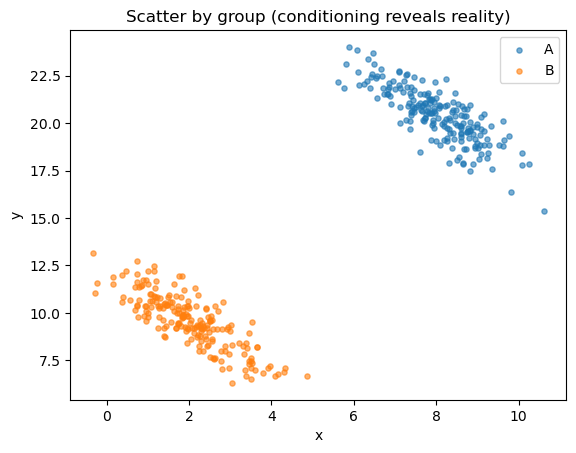


Key ideas:
1) A confounder (group) can create or reverse an overall association.
2) 'Overall' is a mixture of subpopulations.
3) Stratify by plausible confounders before telling a story.

Try:
- Change group means (8→6, 2→4). Can you make the overall correlation near 0?
- Add a third group C. How quickly does the overall plot become misleading?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(12)

# Two groups with different typical x and y levels
nA, nB = 200, 200

# Group A: higher x on average, higher y on average, but NEGATIVE slope within group
xA = rng.normal(8.0, 1.0, size=nA)
yA = 30.0 - 1.2 * xA + rng.normal(0, 0.8, size=nA)

# Group B: lower x on average, lower y on average, but NEGATIVE slope within group
xB = rng.normal(2.0, 1.0, size=nB)
yB = 12.0 - 1.2 * xB + rng.normal(0, 0.8, size=nB)

df = pd.DataFrame({
    "group": ["A"]*nA + ["B"]*nB,
    "x": np.concatenate([xA, xB]),
    "y": np.concatenate([yA, yB]),
})

overall_corr = float(df[["x","y"]].corr().iloc[0,1])
corr_A = float(df[df["group"]=="A"][["x","y"]].corr().iloc[0,1])
corr_B = float(df[df["group"]=="B"][["x","y"]].corr().iloc[0,1])

print("Overall corr:", overall_corr)
print("Group A corr:", corr_A)
print("Group B corr:", corr_B)

plt.figure()
plt.scatter(df["x"], df["y"], s=14, alpha=0.6)
plt.title(f"Overall scatter (corr={overall_corr:.2f})")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

plt.figure()
for g in ["A", "B"]:
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], s=14, alpha=0.6, label=g)
plt.title("Scatter by group (conditioning reveals reality)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

print("\nKey ideas:")
print("1) A confounder (group) can create or reverse an overall association.")
print("2) 'Overall' is a mixture of subpopulations.")
print("3) Stratify by plausible confounders before telling a story.")

print("\nTry:")
print("- Change group means (8→6, 2→4). Can you make the overall correlation near 0?")
print("- Add a third group C. How quickly does the overall plot become misleading?")

## C.4 Causal thinking in EDA: quick checks that reduce self-deception  


<table style="text-align:left;">
    <caption style="font-weight:bold;">Four "Casual Hygiene" Checks</caption>
    <thead>
        <tr>
            <th>Check</th>
            <th>What to Do</th>
            <th>What it protects from</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Direction</td>
            <td>Ask: Could Y influence X?</td>
            <td>Reverse causality stories</td>
        </tr>
        <tr>
            <td>Stratify</td>
            <td>Compare within groups</td>
            <td>Confounding / Simpson's paradox</td>
        </tr>
        <tr>
            <td>Time order</td>
            <td>Ensure X happens before Y; plot over time</td>
            <td>Using future info accidentally</td>
        </tr>
        <tr>
            <td>Negative control</td>
            <td>Test a variable that should not matter</td>
            <td>Pipeline artifacts and spurious discovery</td>
        </tr>
    </tbody>
</table>  



## C.5 Lab Exercise

# D. Hypotheses Generation

* **D.1** EDA vs confirmation: what a hypothesis is for
* **D.2** Asking good questions: A reusable template
* **D.3** Turning plots into testable hypotheses
* **D.4** Hypothesis backlog: ranking by impact and falsifiablity
* **D.4** JupyterHub Notebook - In Lab Notebook

The output of EDA is not insights. The output is a short list of hypotheses you can test. Good hypotheses are specific, falsifiable, and tied to a decision.  

In this section we will go over a simple workflow:  
**observe &rarr; propose &rarr; predict &rarr; test  

EDA is a hypothesis generator. Modeling and inference are hyposthesis filters.

## D.1 EDA vs Confirmation: What "a Hypothesis" is for

Exploratory analysis suggests candidates. Confirmatory analysis decides what is real  

**Exploration is allowed to be wrong**  
In EDA, you are allowed to chase patterns, but you are not allowed to believe them without checks. The discipline is writing down what you think might be true, and what would change your mind.  

<table style="text-align:left;">
    <thead>
        <tr>
            <th></th>
            <th>Exploratory (EDA)</th>
            <th>Confirmatory</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Goal</td>
            <td>Find candidate explanations</td>
            <td>Decide which survive</td>
        </tr>
        <tr>
            <td>Output</td>
            <td>Hypothesis backlog</td>
            <td>Accepted/rejected claims with uncertainty</td>
        </tr>
        <tr>
            <td>Risk</td>
            <td>False discovery</td>
            <td>Overconfidence/underpowered tests</td>
        </tr>
        <tr>
            <td>Safeguard</td>
            <td>Stratify, sanity checks, time splits</td>
            <td>Holdout data, explicit inference, experiments</td>
        </tr>
    </tbody>
</table>

**EDA Rule:**
Ever insight should become a testable sentence + a next check

### Microlab: Turning an observation into a prediction

Turn a group difference into a falsifiable prediction

Quantiles by group (median / p90 / p95):
           0.50       0.90       0.95
group                                
A      5.866786  23.848557  33.380808
B      9.206938  35.459349  78.806922


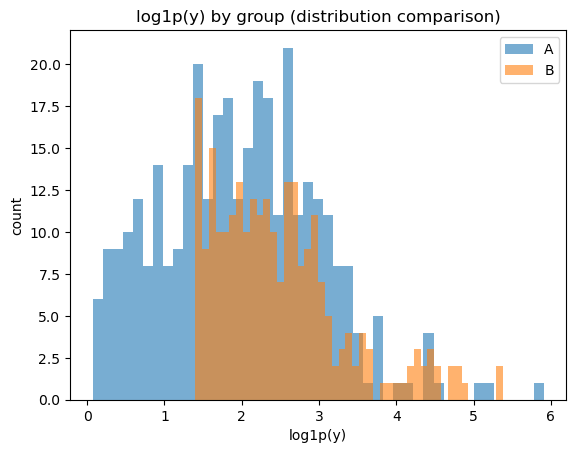


Write a hypothesis like this:
- Observation: Group B has higher median and heavier tail (p95).
- Hypothesis: Process for group B creates longer resolution times.
- Prediction: On a new time window, group B will still have higher median and p95 than group A.
- Next check: Stratify by a confounder (e.g., complaint type) and see if the gap persists.

Try:
- Remove the tail injection for group B. Do medians still differ? How does that change your hypothesis?
- Make group sizes very imbalanced. Does the plot become harder to trust?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(20)

n = 600
group = rng.choice(["A", "B"], size=n, p=[0.55, 0.45])

# Heavy-tailed "resolution time" like variable
base = rng.exponential(scale=8.0, size=n)  # core
tail = rng.exponential(scale=50.0, size=n) * (rng.random(n) < 0.08)  # rare tail
y = base + tail

# Inject a true group effect: group B slightly worse + heavier tail
y = y + np.where(group == "B", 3.0, 0.0) + np.where((group == "B") & (rng.random(n) < 0.05), rng.exponential(80, size=n), 0.0)

df = pd.DataFrame({"group": group, "y": y})

summary = df.groupby("group")["y"].quantile([0.5, 0.9, 0.95]).unstack()
print("Quantiles by group (median / p90 / p95):")
print(summary)

plt.figure()
for g in ["A", "B"]:
    vals = df.loc[df["group"] == g, "y"]
    plt.hist(np.log1p(vals), bins=45, alpha=0.6, label=g)
plt.title("log1p(y) by group (distribution comparison)")
plt.xlabel("log1p(y)")
plt.ylabel("count")
plt.legend()
plt.show()

print("\nWrite a hypothesis like this:")
print("- Observation: Group B has higher median and heavier tail (p95).")
print("- Hypothesis: Process for group B creates longer resolution times.")
print("- Prediction: On a new time window, group B will still have higher median and p95 than group A.")
print("- Next check: Stratify by a confounder (e.g., complaint type) and see if the gap persists.")

print("\nTry:")
print("- Remove the tail injection for group B. Do medians still differ? How does that change your hypothesis?")
print("- Make group sizes very imbalanced. Does the plot become harder to trust?")

## D.2 Asking Good Questions (a reusable template)  

Good questions are specific, measurable, and connected to a decision.  

**The hypothesis template**  

Use this template whenever you notice an interesting pattern:

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Field</th>
            <th>What to write</th>
            <th>Example (NYC 311 flavored)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Observation</td>
            <td>What you saw (plot/table)</td>
            <td>Agency X has much higher p95 resolution time</td>
        </tr>
        <tr>
            <td>Hypothesis</td>
            <td>Possible explanation</td>
            <td>Agency X handles more complex complaint types</td>
        </tr>
        <tr>
            <td>Prediction</td>
            <td>What should also be true if hypothesis is true</td>
            <td>Whithin each complaint type, the gap shrinks</td>
        </tr>
        <tr>
            <td>Confounders</td>
            <td>What else could cause it</td>
            <td>Seasonality, borough mix, reporting changes</td>
        </tr>
        <tr>
            <td>Next check</td>
            <td>Fastest test/plot</td>
            <td>Stratify + compare medians/p95 within strata</td>
        </tr>
    </tbody>
</table>


**NOTE:**  
If you cannot write a prediction, you do not have a hypothesis yet. You have a feeling.

### Microlab: Write Hypotheses from Synthetic EDA Cards  

Generate scenarios and practice writing predictions + next checks

In [2]:
import numpy as np
import pandas as pd

rng = np.random.default_rng(21)

def scenario_cards():
    cards = []

    # Card 1: time drift (logging change)
    cards.append({
        "scenario": "Time drift",
        "observation": "Average 'resolution_hours' drops sharply on a specific date.",
        "hint": "Could be operational improvement OR a process/logging change."
    })

    # Card 2: confounding by group
    cards.append({
        "scenario": "Confounding",
        "observation": "Complaint type appears strongly related to resolution time overall.",
        "hint": "Check whether certain agencies dominate certain complaint types."
    })

    # Card 3: selection bias
    cards.append({
        "scenario": "Selection bias",
        "observation": "Closed cases look 'fast' compared to open cases.",
        "hint": "Open cases are censored — you haven't observed their final resolution time."
    })

    # Card 4: rare tail risk
    cards.append({
        "scenario": "Tail risk",
        "observation": "Median resolution time is stable, but p99 explodes for one agency.",
        "hint": "Rare events, backlog dumps, extreme complexity, or data errors."
    })

    return pd.DataFrame(cards)

df = scenario_cards()
print(df.to_string(index=False))

answers = [
    {
        "scenario": "Time drift",
        "hypothesis": "A logging/process change started on that date (e.g., resolution clock reset or auto-close).",
        "prediction": "Other fields change the same day: more missing values, different status mix, step-change in counts.",
        "confounder": "A real operational improvement (new staffing/SLA policy) began that day.",
        "next_check": "Plot daily mean/median + volume; add vertical line on date; compare distributions pre/post; check missingness."
    },
    {
        "scenario": "Confounding",
        "hypothesis": "Agency drives both complaint type and resolution time; complaint type is a proxy for agency.",
        "prediction": "Within each agency, the complaint-type effect shrinks or disappears; agency-adjusted model reduces effect size.",
        "confounder": "Complaint type truly causes longer workflows independent of agency.",
        "next_check": "Pivot table: mean resolution by (agency, complaint_type); stratified boxplots; regression with agency fixed effects."
    },
    {
        "scenario": "Selection bias",
        "hypothesis": "Open cases look slower because they’re censored; long cases remain open while short cases close quickly.",
        "prediction": "Among cases with similar age, those that close soon are the easy ones; open-case ‘current age’ is less than final time.",
        "confounder": "Open cases are genuinely a different population (more complex) not just censoring.",
        "next_check": "Survival analysis / Kaplan–Meier; compare “age so far” distributions; cohort by created_date and track closure over time."
    },
    {
        "scenario": "Tail risk",
        "hypothesis": "One-off backlog dump or rare extreme events (or data errors) created huge resolution times for that agency.",
        "prediction": "A small number of records drive p99; extreme values cluster in time or in a specific complaint subtype/status.",
        "confounder": "Agency changed what it accepts (more complex cases), legitimately increasing tail latency.",
        "next_check": "Inspect top 1% rows; plot p99 over time; check for impossible values; look for duplicated/reopened cases."
    }
]

print("\nYour task (write this in your notes):")
print("For each scenario:")
print("1) Hypothesis (possible explanation)")
print("2) Prediction (what else should be true)")
print("3) Confounder (alternative explanation)")
print("4) Next check (fastest test/plot)")
print("\nExample responses can be found in the code")

      scenario                                                         observation                                                                        hint
    Time drift        Average 'resolution_hours' drops sharply on a specific date.               Could be operational improvement OR a process/logging change.
   Confounding Complaint type appears strongly related to resolution time overall.            Check whether certain agencies dominate certain complaint types.
Selection bias                    Closed cases look 'fast' compared to open cases. Open cases are censored — you haven't observed their final resolution time.
     Tail risk  Median resolution time is stable, but p99 explodes for one agency.             Rare events, backlog dumps, extreme complexity, or data errors.

Your task (write this in your notes):
For each scenario:
1) Hypothesis (possible explanation)
2) Prediction (what else should be true)
3) Confounder (alternative explanation)
4) Next check (fastest test/p

## D.3 Turning Plots into Testable Hypotheses

"Interesting plot" becomes "testable claim" by naming variables, groups, and a threshold.  

<table style="text-align:left;">
    <caption style="font-weight:bold;">Three Common Hypothesis Types in EDA</caption>
    <thead>
        <tr>
            <th>Type</th>
            <th>Form</th>
            <th>Example</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Difference</td>
            <td>Group A > Group B (median/p95/rate)</td>
            <td>p95 resolution time is higher for Agency X than Y</td>
        </tr>
        <tr>
            <td>Trend</td>
            <td>Metric drifts with time</td>
            <td>Resolution time worsens during winter months</td>
        </tr>
        <tr>
            <td>Mechanism Proxy</td>
            <td>Feature is a proxy for complexity/backlog</td>
            <td>More duplicates &rarr; longer resolution (proxying backlog)</td>
        </tr>
    </tbody>
    
</table>

Fro almost any pattern, there are usually three categories of explanations:
* **Real mechanism:** a genuine process difference.
* **Mixing:** confounding by groups (agency/type/borough/time)
* **Artifact:** Data logging changes, missingness, censoring, duplicates.

### Microlab: Trend vs Mixing (Composition Shift)  

Overall drift can be caused by changing group mix

Overall median by week (first 10):
week
0    4.387161
1    5.166292
2    6.552723
3    5.923743
4    6.576231
5    6.202077
6    5.074681
7    6.987509
8    6.312410
9    4.662785
Name: y, dtype: float64


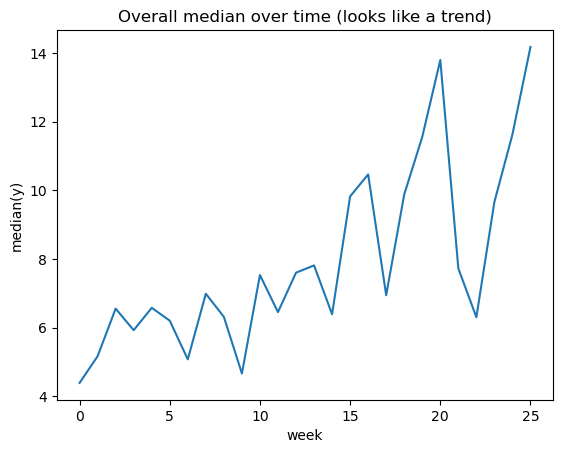

<Figure size 640x480 with 0 Axes>

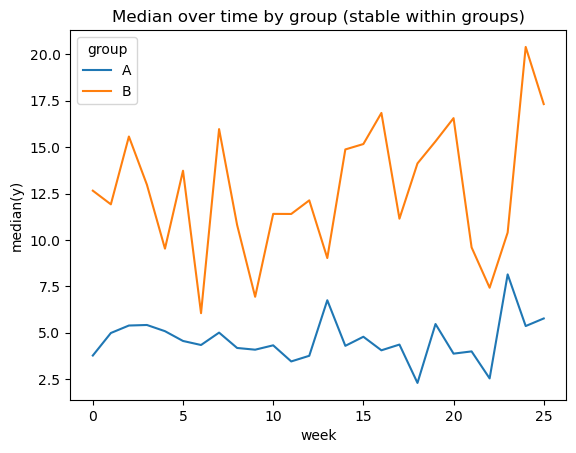

<Figure size 640x480 with 0 Axes>

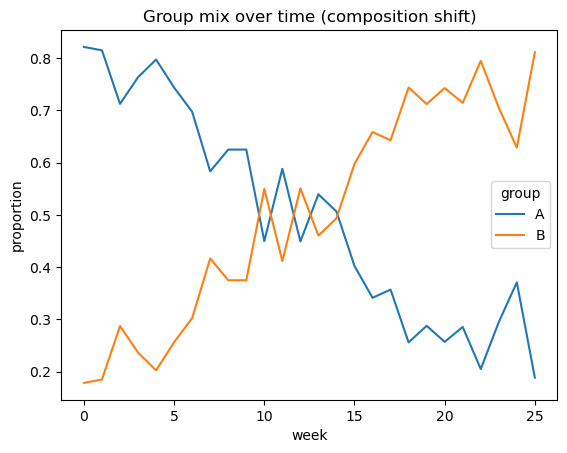


Key ideas:
1) Overall trends can be caused by changing composition (mixing).
2) A good hypothesis names whether you believe the mechanism changed or the mix changed.
3) Next check: plot within-group trends + group proportions over time.

Try:
- Make group B slowly worse over time (add +0.02*day). Can you detect that vs mix shift?
- Increase the tail probability. Does it change medians much? What about p95?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(22)

n = 2000
day = rng.integers(0, 180, size=n)

# Group probability changes over time (mix shift)
p_A = np.clip(0.85 - day / 250, 0.25, 0.85)
group = np.where(rng.random(n) < p_A, "A", "B")

# Within-group resolution is stable (no time trend within groups)
y = np.where(group == "A", rng.exponential(6.0, size=n), rng.exponential(16.0, size=n))
y = y + (rng.random(n) < 0.06) * rng.exponential(60.0, size=n)  # rare tail events

df = pd.DataFrame({"day": day, "group": group, "y": y})
df["week"] = (df["day"] // 7).astype(int)

overall = df.groupby("week")["y"].median()
by_group = df.groupby(["week","group"])["y"].median().unstack()

mix = df.groupby("week")["group"].value_counts(normalize=True).unstack().fillna(0.0)

print("Overall median by week (first 10):")
print(overall.head(10))

plt.figure()
overall.plot()
plt.title("Overall median over time (looks like a trend)")
plt.xlabel("week")
plt.ylabel("median(y)")
plt.show()

plt.figure()
by_group.plot()
plt.title("Median over time by group (stable within groups)")
plt.xlabel("week")
plt.ylabel("median(y)")
plt.show()

plt.figure()
mix.plot()
plt.title("Group mix over time (composition shift)")
plt.xlabel("week")
plt.ylabel("proportion")
plt.show()

print("\nKey ideas:")
print("1) Overall trends can be caused by changing composition (mixing).")
print("2) A good hypothesis names whether you believe the mechanism changed or the mix changed.")
print("3) Next check: plot within-group trends + group proportions over time.")

print("\nTry:")
print("- Make group B slowly worse over time (add +0.02*day). Can you detect that vs mix shift?")
print("- Increase the tail probability. Does it change medians much? What about p95?")

## D.4 Hypothesis Backlog: Ranking by Impact and Falsifiablity

You can generate infinite hypothesis. The skill is choosing the next two worth testing.  

**Maintain a backlog (like product work)**  
Treat hypotheses like tasks: each entry has a claim, a prediction, and a cheap next check. Then rank them by how much they matter and how easy they are to falsify.  

<table style="text-align: left;">
    <thead>
        <tr>
            <th>Dimension</th>
            <th>High score means</th>
            <th>Example signal</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Decision impact</td>
            <td>Changes what you would do</td>
            <td>Would change staffing/routing/triage</td>
        </tr>
        <tr>
            <td>Falsifiability</td>
            <td>Can be disproven quickly</td>
            <td>Time-split or stratify test available</td>
        </tr>
        <tr>
            <td>Robustness</td>
            <td>Likely stable across windows</td>
            <td>Persists in multiple time slices</td>
        </tr>
        <tr>
            <td>Cost</td>
            <td>Cheap to investigate</td>
            <td>No new data required</td>
        </tr>
    </tbody>
</table>

### Microlab: Score and Rank a Hypothesis List  

Rank hypothesis by impact, falsifiability, robustness, and cost

In [4]:
import pandas as pd

backlog = pd.DataFrame([
    {
        "hypothesis": "Agency differences are mostly complaint-type mix (not process).",
        "impact": 4,
        "falsifiable": 5,
        "robust": 4,
        "cost": 5,
        "next_check": "Stratify by complaint_type; compare agency medians/p95 within strata."
    },
    {
        "hypothesis": "A logging change reduced recorded resolution time after a date.",
        "impact": 5,
        "falsifiable": 4,
        "robust": 3,
        "cost": 4,
        "next_check": "Plot missingness and field distributions before/after date; check volume spikes."
    },
    {
        "hypothesis": "Borough is a proxy for complexity; explains tail risk.",
        "impact": 3,
        "falsifiable": 4,
        "robust": 3,
        "cost": 5,
        "next_check": "Compare p95 by borough within complaint type and agency."
    },
    {
        "hypothesis": "A small set of complaint types drive most p99 tail events.",
        "impact": 4,
        "falsifiable": 5,
        "robust": 4,
        "cost": 4,
        "next_check": "List top complaint types by p99 and count; inspect raw examples."
    },
])

# Simple score: weight impact and falsifiability more
backlog["score"] = 0.35*backlog["impact"] + 0.35*backlog["falsifiable"] + 0.2*backlog["robust"] + 0.1*backlog["cost"]
backlog = backlog.sort_values("score", ascending=False)

print(backlog[["hypothesis","score","next_check"]].to_string(index=False))

print("\nTry:")
print("- Change the weights. What jumps to the top?")
print("- Add a hypothesis of your own and score it.")

                                                     hypothesis  score                                                                       next_check
Agency differences are mostly complaint-type mix (not process).   4.45            Stratify by complaint_type; compare agency medians/p95 within strata.
     A small set of complaint types drive most p99 tail events.   4.35                 List top complaint types by p99 and count; inspect raw examples.
A logging change reduced recorded resolution time after a date.   4.15 Plot missingness and field distributions before/after date; check volume spikes.
         Borough is a proxy for complexity; explains tail risk.   3.55                         Compare p95 by borough within complaint type and agency.

Try:
- Change the weights. What jumps to the top?
- Add a hypothesis of your own and score it.


## D.5 Lab exercise

# 3.E Inference (Intuition-first)

In EDA opinions form fast. Statistical inference is how we keep those opinions honest. The key idea is simple. The dataset is one sample from a larger process, and if a different sample was collected, the results would change.  

This section builds on intuition for sampling variablity and uncertainty. Use simulation and bootstrapping to see why confidence is earned, not assumed

## 3E.1 Sampling Variability: Why Estimates Wiggle

Two samples from the same world can tell different stories, especially with small n.  

**The mental model**
Imagine a "true" population that you cannot fully observe. The dataset is a finite sample from it. When you compute a statistic (mean, median, p95) you are estimating a population value; and that estimate has noise.

**Practical consequence** 
If your insight dissapears when you change the time window or resample the data, it probably was not a stable insight.

### Microlab: Sampling Variability of the Mean  

Sample repeatedly; watch the mean wiggle; increase n

Mean of sample means (n=20): 9.992990422826773
Std of sample means (n=20): 2.2557352774828043
Mean of sample means (n=400): 10.004896979687645
Std of sample means (n=400): 0.5024826995611064


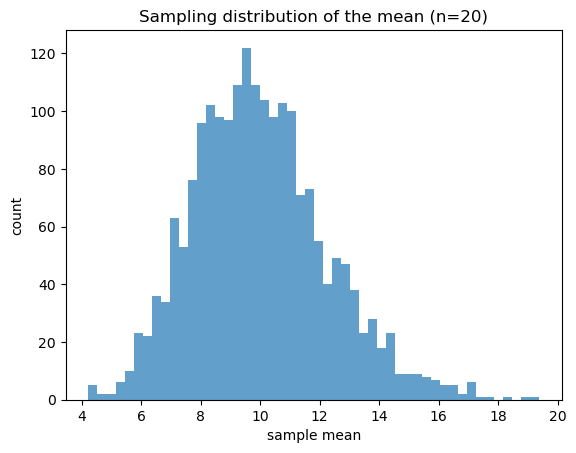

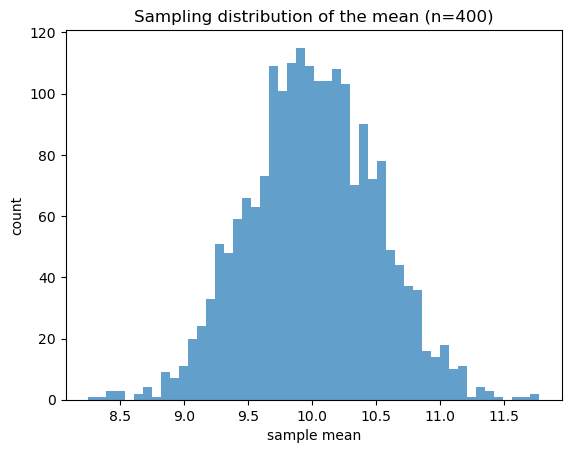


Key ideas:
1) The same world produces different samples → different estimates.
2) Larger n shrinks variability of the mean.
3) With heavy tails, you often need more data than you expect.

Try:
- Change scale=10 → 30. What happens to variability?
- Replace exponential with normal. What changes?
- Track the median instead of mean. Is it more stable here?


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(30)

def sample_means(n, reps=2000):
    # heavy-tailed-ish distribution (exponential)
    means = []
    for _ in range(reps):
        x = rng.exponential(scale=10.0, size=n)
        means.append(x.mean())
    return np.array(means)

means_small = sample_means(n=20)
means_large = sample_means(n=400)

print("Mean of sample means (n=20):", float(means_small.mean()))
print("Std of sample means (n=20):", float(means_small.std()))
print("Mean of sample means (n=400):", float(means_large.mean()))
print("Std of sample means (n=400):", float(means_large.std()))

plt.figure()
plt.hist(means_small, bins=50, alpha=0.7, label="n=20")
plt.title("Sampling distribution of the mean (n=20)")
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(means_large, bins=50, alpha=0.7, label="n=400")
plt.title("Sampling distribution of the mean (n=400)")
plt.xlabel("sample mean")
plt.ylabel("count")
plt.show()

print("\nKey ideas:")
print("1) The same world produces different samples → different estimates.")
print("2) Larger n shrinks variability of the mean.")
print("3) With heavy tails, you often need more data than you expect.")

print("\nTry:")
print("- Change scale=10 → 30. What happens to variability?")
print("- Replace exponential with normal. What changes?")
print("- Track the median instead of mean. Is it more stable here?")

## 3E.2 Uncertainty in Estimates: Intervals as Plausible Ranges

A single number hides uncertainty. Intervals expose it  

**Intervals are not magic**  
An interval is a compact way to communicate uncertainty: "Given the data we saw, the true value is plausibly in this range".  

<table style="text-align:left;">
    <thead>
        <tr>
            <th>Situation</th>
            <th>What happens to uncertainty</th>
            <th>Why</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Small sample size</td>
            <td>Wider</td>
            <td>Less information</td>
        </tr>
        <tr>
            <td>High variability/heavy tails</td>
            <td>Wider</td>
            <td>More noise in the estimate</td>
        </tr>
        <tr>
            <td>Stronger signal</td>
            <td>Narrower (often)</td>
            <td>Effect dominates noise</td>
        </tr>
    </tbody>
</table>

### Microlab: Plausible Range for a Mean via Simulation  

Will do two things:
1. Plot the underlying distribution
2. Simulate repeated sampling: draw many samples of size n, compute the mean for each, and then look at the distribution of those means

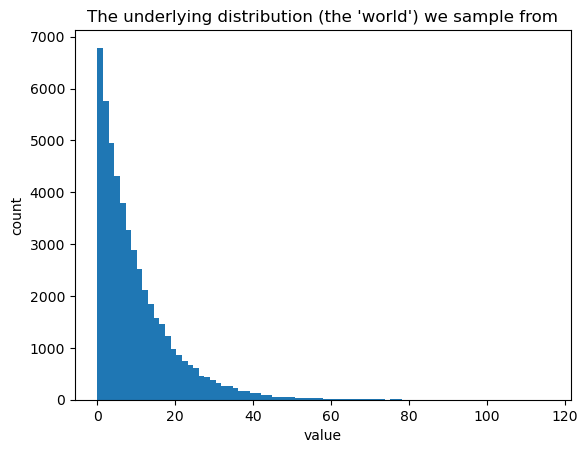

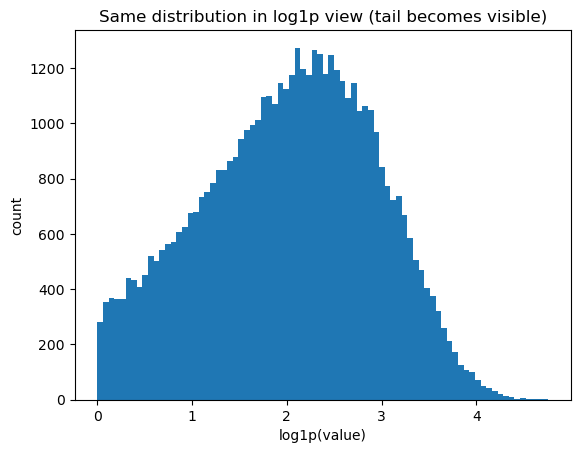

Simulated 95% range for the sample mean:
  lo: 7.633218679782686
  hi: 12.663791138593394
  width: 5.030572458810708
  (true mean for exponential is scale = 10.0 )


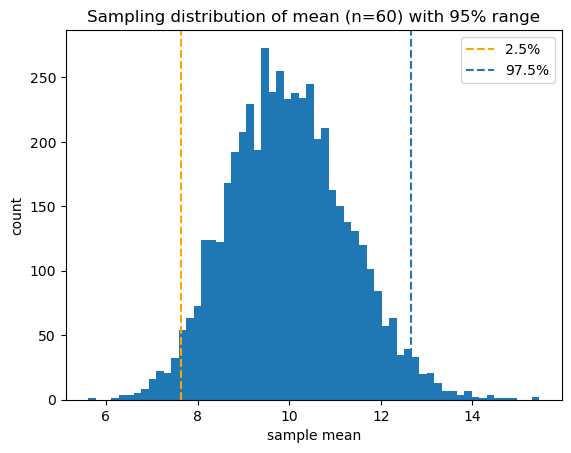


Key ideas:
1) The mean you compute from one dataset is one draw from a whole distribution of possible means.
2) The 95% range is about repeated sampling: most sample means fall inside it.
3) Heavy tails make the mean noisier; bigger n shrinks the range.

Try:
- Change n from 60 → 15 and then 200. Watch the interval width change.
- Change true_scale from 10 → 25. Does the interval widen?
- Replace exponential with normal (rng.normal). Does the mean become more stable?


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import io, base64


# Think of this as the "true world" distribution.
# We'll use an exponential distribution to mimic a heavy-tailed operational metric.
true_scale = 10.0

# 1) First: visualize the distribution we are sampling from.
world = rng.exponential(scale=true_scale, size=50_000)

plt.figure()
plt.hist(world, bins=80)
plt.title("The underlying distribution (the 'world') we sample from")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(np.log1p(world), bins=80)
plt.title("Same distribution in log1p view (tail becomes visible)")
plt.xlabel("log1p(value)")
plt.ylabel("count")
plt.show()

# 2) Now: simulate repeated sampling from this world and compute sample means.
n = 60        # sample size (one dataset)
reps = 5000   # how many hypothetical datasets we simulate

# This line creates 'reps' independent datasets of size n, computes the mean of each,
# and stores those means. It is simulating "re-running the data collection process"
# reps times and asking: how much does the mean vary purely due to sampling randomness?
means = np.array([rng.exponential(scale=true_scale, size=n).mean() for _ in range(reps)])

lo, hi = np.quantile(means, [0.025, 0.975])

print("Simulated 95% range for the sample mean:")
print("  lo:", float(lo))
print("  hi:", float(hi))
print("  width:", float(hi - lo))
print("  (true mean for exponential is scale =", true_scale, ")")

plt.figure()
plt.hist(means, bins=60)
plt.axvline(lo, linestyle="--", color="orange", label="2.5%")
plt.axvline(hi, linestyle="--", label="97.5%")
plt.title(f"Sampling distribution of mean (n={n}) with 95% range")
plt.xlabel("sample mean")
plt.ylabel("count")
plt.legend()
plt.show()

print("\nKey ideas:")
print("1) The mean you compute from one dataset is one draw from a whole distribution of possible means.")
print("2) The 95% range is about repeated sampling: most sample means fall inside it.")
print("3) Heavy tails make the mean noisier; bigger n shrinks the range.")

print("\nTry:")
print("- Change n from 60 → 15 and then 200. Watch the interval width change.")
print("- Change true_scale from 10 → 25. Does the interval widen?")
print("- Replace exponential with normal (rng.normal). Does the mean become more stable?")

## 3E.3 The Bootstrap: Uncertainty without Fancy Formulas

Estimate uncertainty by reusing the existing data.  

**Bootstrap intuition**  

In E.2 we simulated repeated sampling from a known "world". In real life, you usually do not know the true population distribution. You only have the dataset  

The bootstrap treats the dataset as a stand-in for the population: it repeatedly samples rows with replacement, recomputes the statistic, and uses the variation across resamples to estimate uncertainty.  

Each bootstrap resample is the same size as the dataset, but some rows repeat and some are missing. That is intentional, it mimics the randomness of sampling without knowing the true population

### Microlab: Bootstrap interval for the median (robust + practical)

Medians are common in operational data (like resolution times) because tails are nasty. Here you will bootstrap a median and build a 95% interval. We will do two things:  
1. Plot the observed sample
2. Bootstrap: resample the sample many times, compute the median each time, and build a 95% interval

Observed sample summary:
count    300.000000
mean      11.625546
std       20.323428
min        0.014215
50%        5.660074
90%       23.836976
95%       34.613143
99%      129.776918
max      195.908130
dtype: float64


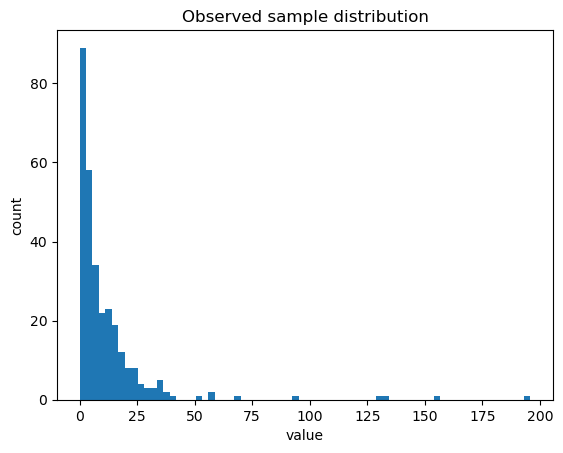

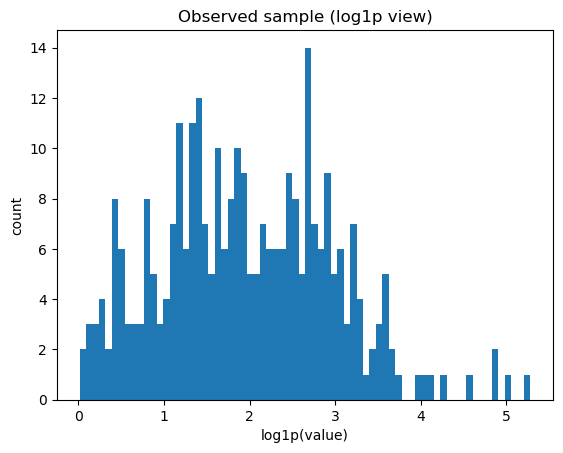


Sample median: 5.660074248859582
Bootstrap 95% interval for median:
  lo: 4.766801768770599
  hi: 7.055343621043355
  width: 2.288541852272756


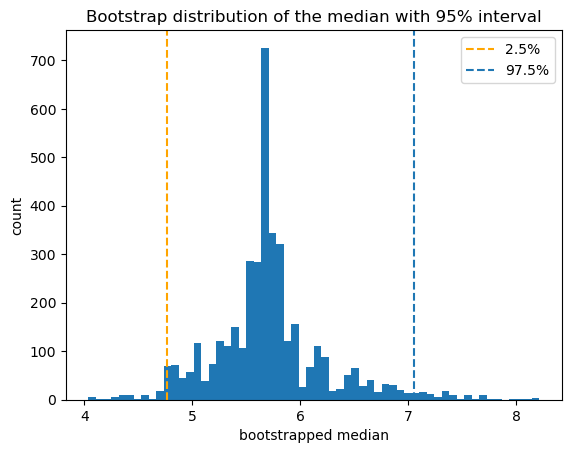


Key ideas:
1) Bootstrap estimates uncertainty from the data you observed, without assuming a parametric form.
2) The median is often stable for heavy-tailed metrics.
3) If the interval is wide, your 'typical' value is fragile — you may need more data or a different metric.

Try:
- Cut sample size to 60. Does the interval widen?
- Bootstrap the mean instead of median. Is it wider in heavy-tailed data?
- Bootstrap p95. Does it become much noisier than the median? Why?


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(32)

# Observed sample (think: a slice of NYC 311 resolution_hours)
# Heavy-tailed: many small values, rare big values.
x = pd.Series(
    rng.exponential(scale=10.0, size=300)
    + (rng.random(300) < 0.06) * rng.exponential(80.0, size=300)
)

print("Observed sample summary:")
print(x.describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

# 1) Plot the observed distribution first
plt.figure()
plt.hist(x, bins=70)
plt.title("Observed sample distribution")
plt.xlabel("value")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(np.log1p(x), bins=70)
plt.title("Observed sample (log1p view)")
plt.xlabel("log1p(value)")
plt.ylabel("count")
plt.show()

# 2) Bootstrap: resample the observed rows with replacement many times
B = 4000

# This loop creates B bootstrap datasets by sampling rows from x with replacement.
# Each resample is the same size as x, but includes repeats.
# For each resample, we compute the median. The spread of these medians estimates uncertainty.
meds = []
for _ in range(B):
    sample = x.sample(n=len(x), replace=True, random_state=int(rng.integers(0, 1_000_000)))
    meds.append(float(sample.median()))
meds = np.array(meds)

lo, hi = np.quantile(meds, [0.025, 0.975])

print("\nSample median:", float(x.median()))
print("Bootstrap 95% interval for median:")
print("  lo:", float(lo))
print("  hi:", float(hi))
print("  width:", float(hi - lo))

plt.figure()
plt.hist(meds, bins=60)
plt.axvline(lo, linestyle="--", color="orange", label="2.5%")
plt.axvline(hi, linestyle="--", label="97.5%")
plt.title("Bootstrap distribution of the median with 95% interval")
plt.xlabel("bootstrapped median")
plt.ylabel("count")
plt.legend()
plt.show()

print("\nKey ideas:")
print("1) Bootstrap estimates uncertainty from the data you observed, without assuming a parametric form.")
print("2) The median is often stable for heavy-tailed metrics.")
print("3) If the interval is wide, your 'typical' value is fragile — you may need more data or a different metric.")

print("\nTry:")
print("- Cut sample size to 60. Does the interval widen?")
print("- Bootstrap the mean instead of median. Is it wider in heavy-tailed data?")
print("- Bootstrap p95. Does it become much noisier than the median? Why?")

## 3E.4 A/B Intuition: Difference of Means is Noise

Group A is higher than Group B, needs uncertainty, not vibes.  

**Difference estimates wobble too**  

When you compare groups, you are estimating a difference between two population values. That difference has uncertainty from both samples, and heavy tails make it worse.  

Always ask: "Is the observed difference big compared to the uncertainty?"

### Microlab: Bootstrap a difference in medians  

Generate two groups, compute the difference in medians, and bootstrap an interval for that difference. This builds intuition for "statistical significance" withought the ceremony.

Observed median(A): 6.412892535656661
Observed median(B): 6.697430990193124
Observed diff (B - A): 0.2845384545364631
Bootstrap 95% interval for diff (B - A):
  lo: -1.8772145959700914
  hi: 2.1463215457351574


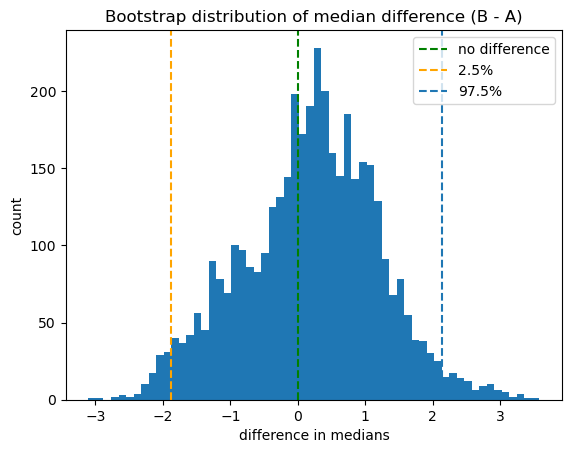


Key ideas:
1) Group differences have uncertainty.
2) If 0 is comfortably inside the interval, the evidence for a difference is weak.
3) Bigger n and lower variance shrink uncertainty.

Try:
- Reduce nA and nB by 4×. What happens to the interval?
- Increase the group gap (scale=9 → 12 for B). When does the interval move away from 0?


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io, base64

rng = np.random.default_rng(33)

nA, nB = 260, 240

A = pd.Series(rng.exponential(scale=9.0, size=nA) + (rng.random(nA) < 0.05) * rng.exponential(70.0, size=nA))
B = pd.Series(rng.exponential(scale=10.2, size=nB) + (rng.random(nB) < 0.05) * rng.exponential(70.0, size=nB))

diff_obs = float(B.median() - A.median())
print("Observed median(A):", float(A.median()))
print("Observed median(B):", float(B.median()))
print("Observed diff (B - A):", diff_obs)

Bboot = 4000
diffs = []
for _ in range(Bboot):
    As = A.sample(n=len(A), replace=True, random_state=int(rng.integers(0, 1_000_000)))
    Bs = B.sample(n=len(B), replace=True, random_state=int(rng.integers(0, 1_000_000)))
    diffs.append(float(Bs.median() - As.median()))
diffs = np.array(diffs)

lo, hi = np.quantile(diffs, [0.025, 0.975])
print("Bootstrap 95% interval for diff (B - A):")
print("  lo:", float(lo))
print("  hi:", float(hi))

plt.figure()
plt.hist(diffs, bins=60)
plt.axvline(0, linestyle="--", color="green", label="no difference")
plt.axvline(lo, linestyle="--", color="orange", label="2.5%")
plt.axvline(hi, linestyle="--", label="97.5%")
plt.title("Bootstrap distribution of median difference (B - A)")
plt.xlabel("difference in medians")
plt.ylabel("count")
plt.legend()
plt.show()

print("\nKey ideas:")
print("1) Group differences have uncertainty.")
print("2) If 0 is comfortably inside the interval, the evidence for a difference is weak.")
print("3) Bigger n and lower variance shrink uncertainty.")

print("\nTry:")
print("- Reduce nA and nB by 4×. What happens to the interval?")
print("- Increase the group gap (scale=9 → 12 for B). When does the interval move away from 0?")

## 3E.5 Lab Exercise